In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2#image operations

E:\Python\Tensor_Flow_And_Keras\PetImages\Dog


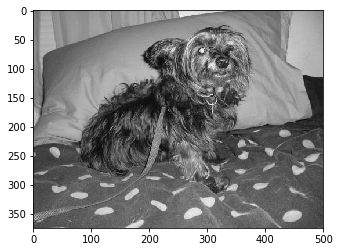

In [2]:
DATA_DIR="E:\Python\Tensor_Flow_And_Keras\PetImages"
CATEGORIES=["Dog","Cat"]

for category in CATEGORIES:
    path=os.path.join(DATA_DIR,category) #path to cats and dogs
    print(path)
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr,cmap='gray')
        plt.show()
        break
    break
        

In [3]:
print(img_arr)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [4]:
print(img_arr.shape)#every image is not of same shape so we have to standardize

(375, 500)


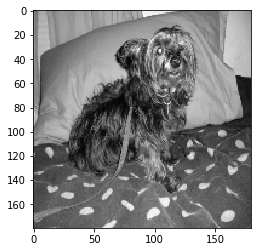

In [5]:
IMG_SIZE=180
new_array=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [18]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATA_DIR,category) #path to cats and dogs
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
    
create_training_data()

In [19]:
print(len(training_data))

24946


In [20]:
import random

random.shuffle(training_data)


In [22]:
for sample in training_data[:5]:
    print(sample[1])
    

0
1
0
0
0


In [23]:
X=[]
y=[]

for features,label in training_data:
    X.append(features)
    y.append(label)
    
#how many features did we have -1 saying it could be many any number,we know shape of data imgsize x imgsize
#and than one bcz of grayscale image
#LAST 1 WILL BE 3 IF USING RGB

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)



In [25]:
import pickle 
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [26]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [28]:
y[1]

1

In [29]:
X[1]

array([[[ 82],
        [ 81],
        [ 73],
        ...,
        [153],
        [152],
        [150]],

       [[ 81],
        [ 79],
        [ 73],
        ...,
        [156],
        [154],
        [151]],

       [[ 81],
        [ 77],
        [ 73],
        ...,
        [157],
        [155],
        [154]],

       ...,

       [[ 49],
        [ 52],
        [ 51],
        ...,
        [ 65],
        [ 67],
        [ 62]],

       [[ 48],
        [ 51],
        [ 49],
        ...,
        [ 62],
        [ 65],
        [ 60]],

       [[ 51],
        [ 54],
        [ 53],
        ...,
        [ 58],
        [ 58],
        [ 60]]], dtype=uint8)

In [ ]:
'''
A nice alternative to pickle is
np.save('features.npy',X) #saving
X=np.load('features.npy')#loading
'''